In [51]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Build neural network functions
def normalize(x):
    mean = np.mean(x)
    std_dev = np.std(x)
    z = (x - mean) / std_dev
    return z

def sigmoid(z):
    z_clipped = np.clip(z, -500, 500)  # Clip values to the range [-500, 500]
    return 1 / (1 + np.exp(-z_clipped))

def linear(x,w,b):
    return (w * x) + b

def compute_loss(y_pred, y):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    loss = np.mean(- (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))) 
    return loss

def backward_prop():
    pass
 
def fit(x, y, lr, epochs, x_test, y_test): # added for test for knowing accuracy and tackle overfitting
    m, n = x.shape
    loss_history = []
    w = np.zeros((n,))
    b = 0 #np.zeros(n,1)
    for i in range(epochs):
        z = np.dot(x, w) + b
        a = sigmoid(z)
        
        dz = a - y
        dw = np.dot(x.T, dz) / m
        db = np.sum(dz) / m
        
        w -= lr * dw
        b -= lr * db
        
        
        
        prediction = predict(normalize(x), w, b)
        prediction_test = predict(normalize(x_test), w, b)
        
        if i % math.ceil(epochs/10) == 0:
            print(f"Iteration: {i:4d}, Loss: {compute_loss(a, y):4f}, Accuracy (train): {accuracy(prediction, y)}%, Accuracy (test): {accuracy(prediction_test, y_test)}")
            loss_history.append(compute_loss(a, y))
            
    return w, b, np.array(loss_history)

def predict(x,w,b):
    z = np.dot(x, w) + b
    a = sigmoid(z)
    y_hat = (a > 0.5).astype(int)
    return y_hat

def accuracy(y_pred, y):
    return  (sum(y_pred == y) / y.shape[0]) * 100

In [4]:
# data
data = pd.read_csv('breast-cancer.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Labelling
mapping = {'M': 1, 'B' : 0}
data.diagnosis = data.diagnosis.map(mapping)
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
data.drop('id', axis=1, inplace=True)

In [8]:
# Train/Test set
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

x_train = x[:400].values
x_test = x[400:].values
y_train = y[:400].values
y_test = y[400:].values

In [9]:
# normalize data
x_train_nz = normalize(x_train)
x_train_nz

array([[-0.19481593, -0.22710628,  0.24990836, ..., -0.27002402,
        -0.26919788, -0.27064564],
       [-0.18386861, -0.19574942,  0.29276415, ..., -0.27036092,
        -0.26998328, -0.27077243],
       [-0.18760258, -0.18098327,  0.28045903, ..., -0.27011907,
        -0.2696171 , -0.27077854],
       ...,
       [-0.21683786, -0.19706479,  0.08124325, ..., -0.27079814,
        -0.27030661, -0.27085088],
       [-0.22422094, -0.20822427,  0.02718555, ..., -0.2709144 ,
        -0.27005118, -0.27076156],
       [-0.22108101, -0.19791342,  0.04818913, ..., -0.27092289,
        -0.26997098, -0.27080556]])

In [75]:
w, b, loss_his = fit(x_train_nz, y_train, 0.1, 50000, x_test, y_test)

Iteration:    0, Loss: 0.693147, Accuracy (train): 43.25%, Accuracy (test): 23.076923076923077
Iteration: 5000, Loss: 0.171266, Accuracy (train): 92.5%, Accuracy (test): 86.98224852071006
Iteration: 10000, Loss: 0.164202, Accuracy (train): 92.75%, Accuracy (test): 86.3905325443787
Iteration: 15000, Loss: 0.161020, Accuracy (train): 92.75%, Accuracy (test): 86.3905325443787
Iteration: 20000, Loss: 0.158695, Accuracy (train): 93.0%, Accuracy (test): 86.3905325443787
Iteration: 25000, Loss: 0.156664, Accuracy (train): 93.0%, Accuracy (test): 86.3905325443787
Iteration: 30000, Loss: 0.154784, Accuracy (train): 93.25%, Accuracy (test): 86.98224852071006
Iteration: 35000, Loss: 0.153012, Accuracy (train): 93.5%, Accuracy (test): 86.3905325443787
Iteration: 40000, Loss: 0.151332, Accuracy (train): 93.75%, Accuracy (test): 86.3905325443787
Iteration: 45000, Loss: 0.149736, Accuracy (train): 93.75%, Accuracy (test): 86.3905325443787


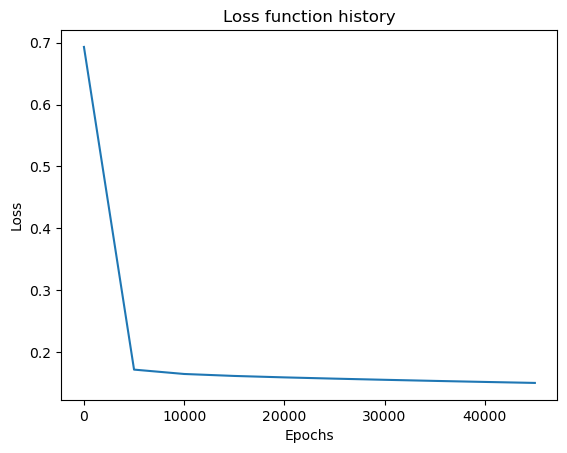

In [76]:
sns.lineplot(y=loss_his, x=np.arange(0,50000,5000))
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("Loss function history")
plt.show()
